# 【第1回_Beginner限定コンペ】銀行の顧客ターゲティング

顧客の属性情報などから定期預金キャンペーンの反応率を予測しよう。

https://signate.jp/competitions/292

Inference編

In [72]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submit_df = pd.read_csv('submit_sample.csv', header=None)

files = {}

files['gbm1'] = 'submit-lg-Copy1.csv'
files['gbm2'] = 'submit-lg-Copy2.csv'
files['gbm3'] = 'submit-lg-Copy3.csv'
files['gbm4'] = 'submit-lg-Copy4.csv'
files['gbm5'] = 'submit-lg-Copy5.csv'

#files['rf1'] = 'submit-rf-Copy1.csv'
#files['rf2'] = 'submit-rf-Copy2.csv'
#files['rf3'] = 'submit-rf-Copy3.csv'
#files['rf4'] = 'submit-rf-Copy4.csv'
#files['rf5'] = 'submit-rf-Copy5.csv'

#files['xg1'] = 'submit-xg-Copy1.csv'
#files['xg2'] = 'submit-xg-Copy2.csv'
#files['xg3'] = 'submit-xg-Copy3.csv'
#files['xg4'] = 'submit-xg-Copy4.csv'
#files['xg5'] = 'submit-xg-Copy5.csv'

#files['nn1'] = 'submit-nn-Copy1.csv'
#files['nn2'] = 'submit-nn-Copy2.csv'
#files['nn3'] = 'submit-nn-Copy3.csv'
#files['nn4'] = 'submit-nn-Copy4.csv'
#files['nn5'] = 'submit-nn-Copy5.csv'

files['dt1'] = 'submit-dt-Copy1.csv'
files['dt2'] = 'submit-dt-Copy2.csv'
files['dt3'] = 'submit-dt-Copy3.csv'
files['dt4'] = 'submit-dt-Copy4.csv'
files['dt5'] = 'submit-dt-Copy5.csv'
files['dt6'] = 'submit-dt-Copy6.csv'

#files['base'] = 'submit.csv'

#files['best'] = 'submit_ensemble_best.csv'

In [74]:
dfs = []
for key, _file in files.items():
    df = pd.read_csv(_file, header=None, index_col=0, names=[key])
    dfs.append(df)
    
_submission = pd.concat(dfs, axis=1)
_submission.info()
_submission.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18050 entries, 0 to 18049
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gbm1    18050 non-null  float64
 1   gbm2    18050 non-null  float64
 2   gbm3    18050 non-null  float64
 3   gbm4    18050 non-null  float64
 4   gbm5    18050 non-null  float64
 5   dt1     18050 non-null  float64
 6   dt2     18050 non-null  float64
 7   dt3     18050 non-null  float64
 8   dt4     18050 non-null  float64
 9   dt5     18050 non-null  float64
 10  dt6     18050 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


,gbm1,gbm2,gbm3,gbm4,gbm5,dt1,dt2,dt3,dt4,dt5,dt6
0,0.741837,0.753065,0.850292,0.725019,0.715813,0.799937,0.746365,0.836237,0.798202,0.745371,0.750599
1,0.083328,0.084933,0.059430,0.091235,0.089046,0.133330,0.150331,0.116229,0.115652,0.126571,0.135863
2,0.024146,0.022098,0.011450,0.024149,0.026666,0.026340,0.024258,0.020888,0.035007,0.026490,0.030946
3,0.002472,0.002444,0.001065,0.002539,0.002749,0.000957,0.002249,0.001037,0.001662,0.001268,0.001584
4,0.039129,0.034946,0.013674,0.044379,0.050298,0.053011,0.073608,0.058356,0.056884,0.039566,0.039677


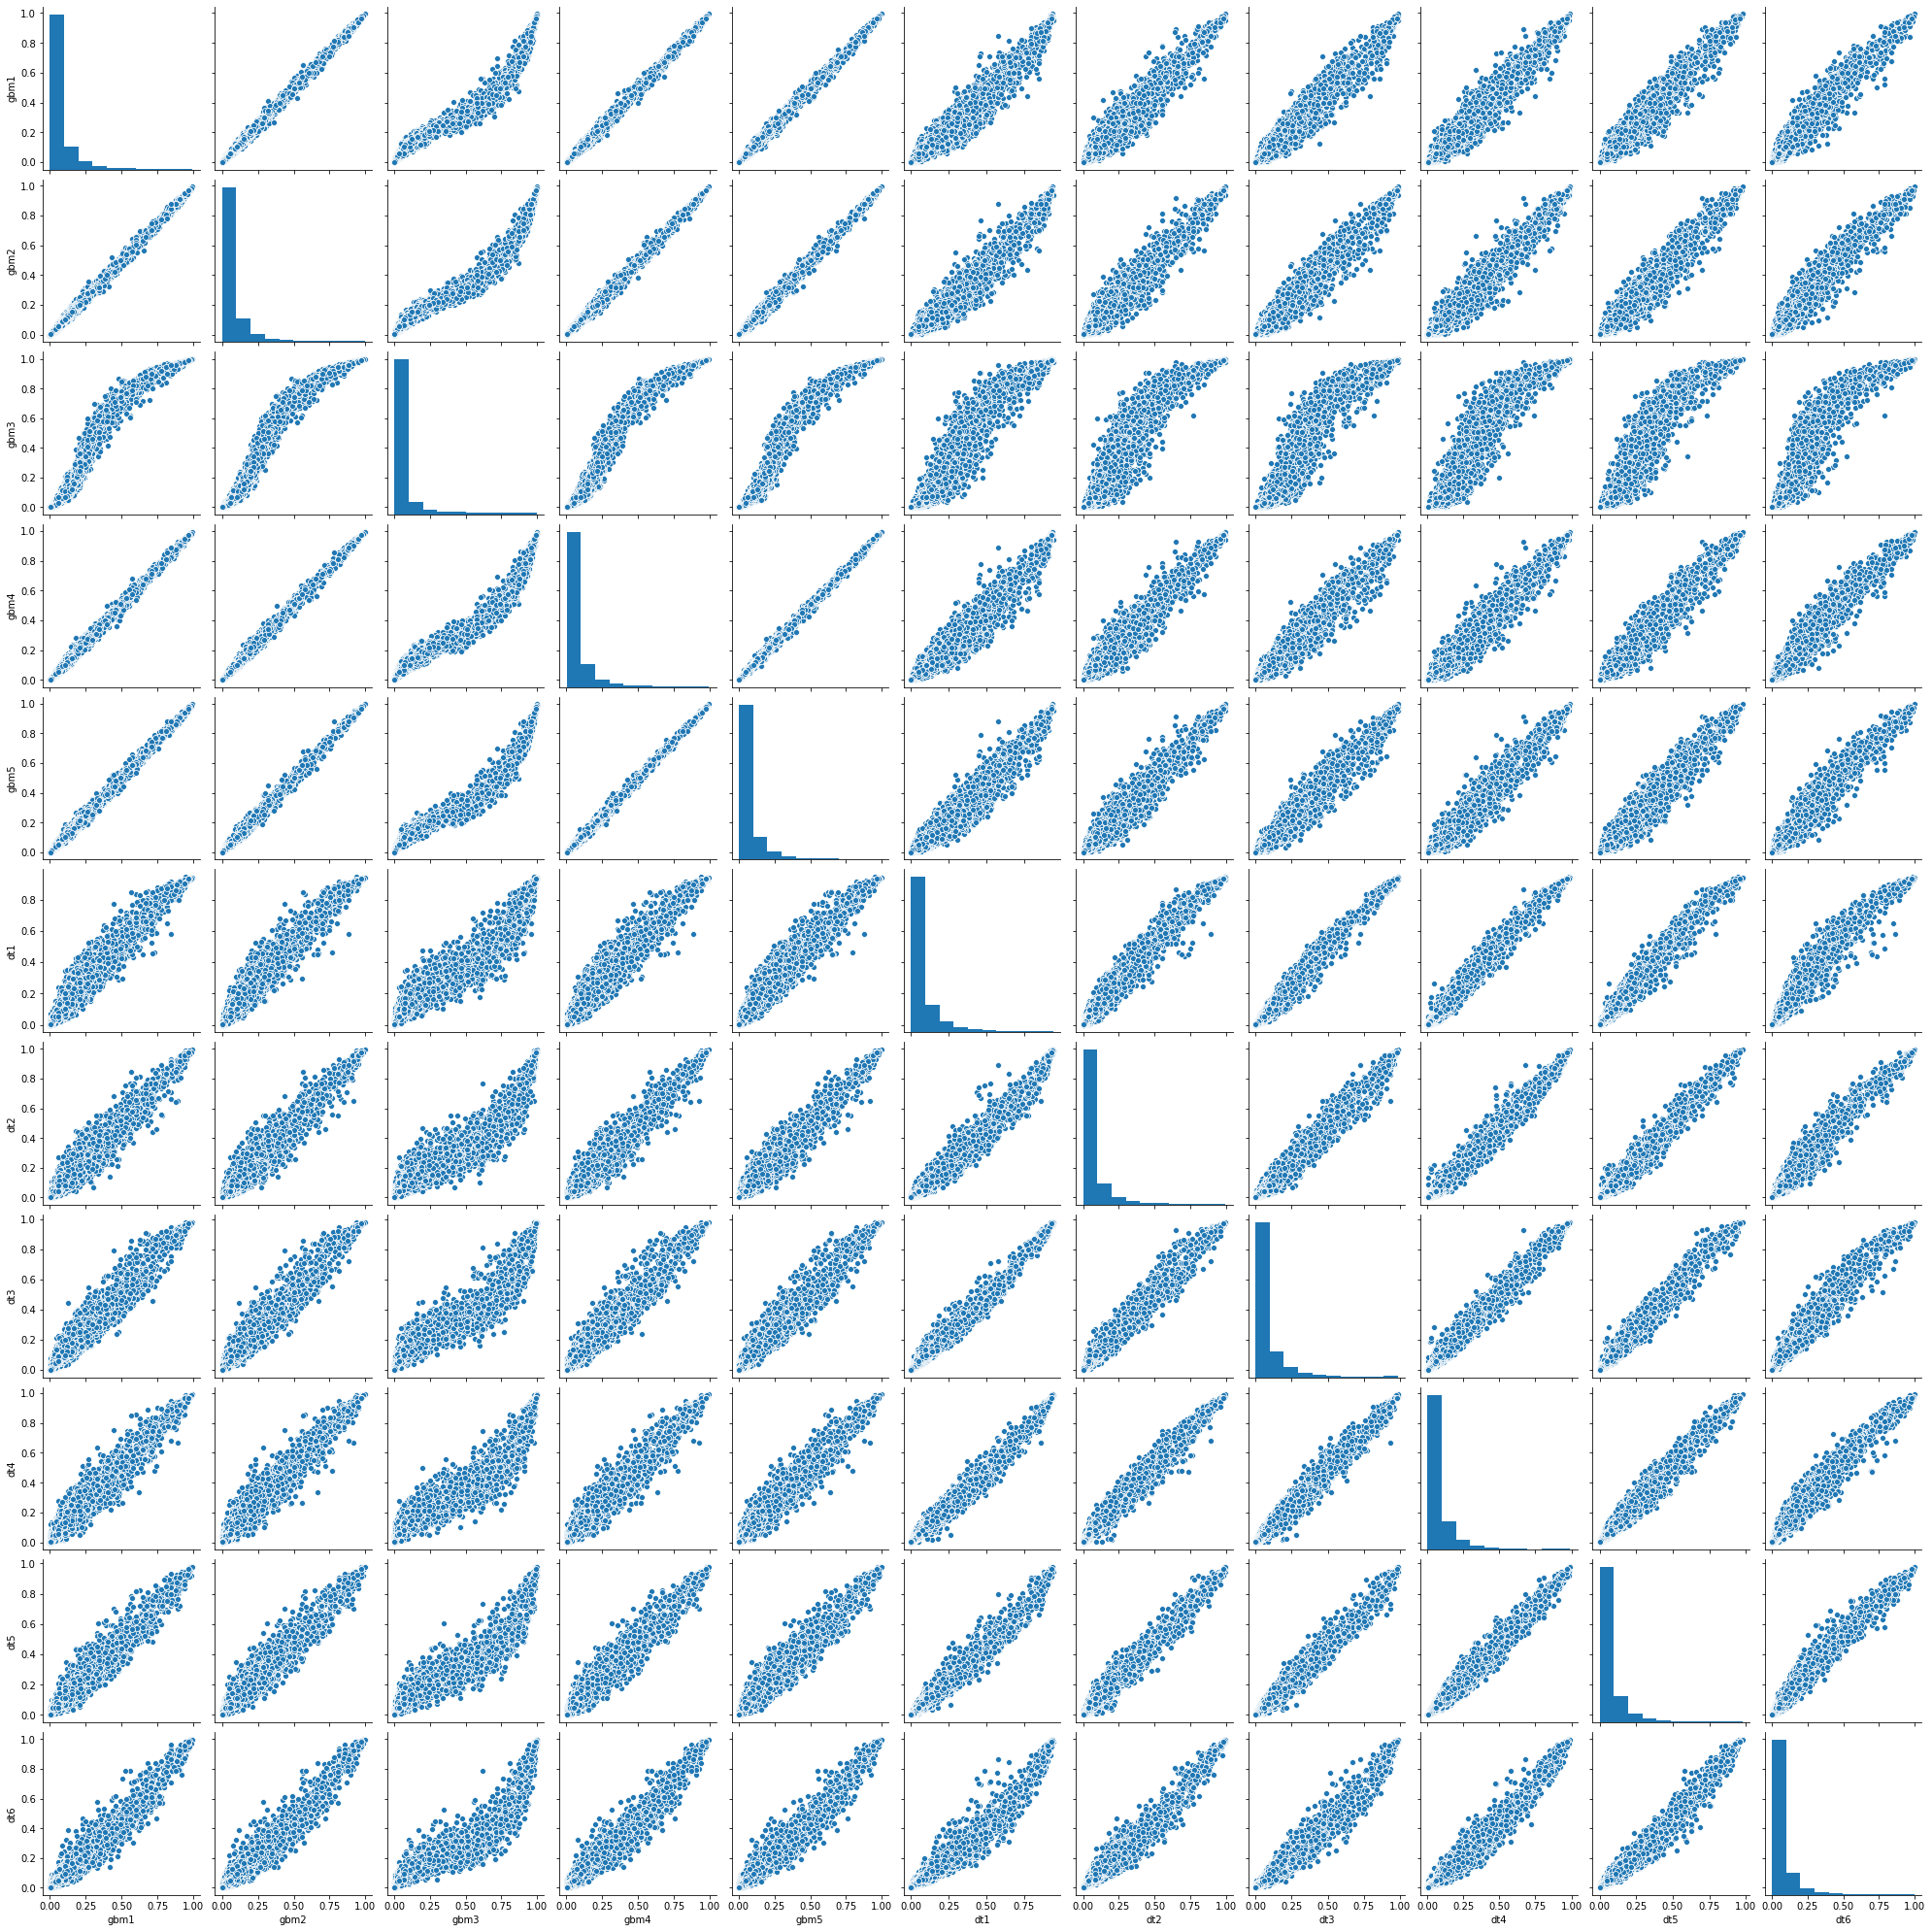

In [75]:
submission_pg = sns.pairplot(_submission)
submission_pg.savefig('submission_df.png')

In [76]:
# Rank Average
#for key in files.keys():
#    _submission[key + '_rank'] = _submission[key].rank()
    
#_submission['rank_sum'] = np.sum(_submission[col] for col in _submission.columns if '_rank' in col)
#_submission['target'] = _submission['rank_sum'] / (len(files) * _submission.shape[0])
_submission.info()
_submission.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18050 entries, 0 to 18049
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gbm1    18050 non-null  float64
 1   gbm2    18050 non-null  float64
 2   gbm3    18050 non-null  float64
 3   gbm4    18050 non-null  float64
 4   gbm5    18050 non-null  float64
 5   dt1     18050 non-null  float64
 6   dt2     18050 non-null  float64
 7   dt3     18050 non-null  float64
 8   dt4     18050 non-null  float64
 9   dt5     18050 non-null  float64
 10  dt6     18050 non-null  float64
dtypes: float64(11)
memory usage: 2.3 MB


,gbm1,gbm2,gbm3,gbm4,gbm5,dt1,dt2,dt3,dt4,dt5,dt6
0,0.741837,0.753065,0.850292,0.725019,0.715813,0.799937,0.746365,0.836237,0.798202,0.745371,0.750599
1,0.083328,0.084933,0.059430,0.091235,0.089046,0.133330,0.150331,0.116229,0.115652,0.126571,0.135863
2,0.024146,0.022098,0.011450,0.024149,0.026666,0.026340,0.024258,0.020888,0.035007,0.026490,0.030946
3,0.002472,0.002444,0.001065,0.002539,0.002749,0.000957,0.002249,0.001037,0.001662,0.001268,0.001584
4,0.039129,0.034946,0.013674,0.044379,0.050298,0.053011,0.073608,0.058356,0.056884,0.039566,0.039677
5,0.005685,0.005376,0.001335,0.005526,0.005576,0.004088,0.004119,0.004937,0.004603,0.003623,0.005727
6,0.005418,0.003938,0.002537,0.004320,0.004746,0.003673,0.004660,0.002907,0.006659,0.004595,0.003832
7,0.158321,0.160382,0.168204,0.155154,0.166271,0.185062,0.137674,0.172729,0.147176,0.171434,0.096287
8,0.037273,0.035843,0.018892,0.037209,0.038660,0.039904,0.042291,0.041617,0.052118,0.051205,0.035155
9,0.004403,0.003770,0.001705,0.004274,0.004723,0.003959,0.006257,0.005314,0.004938,0.005633,0.004898


In [77]:
#submit_df[1] = _submission.iloc[:,-1]
submit_df[1] = _submission.sum(axis=1) / 11

print(submit_df.head())

submit_df.to_csv('submit_ensemble.csv', header=False, index=False)

   0         1
0  0  0.769340
1  1  0.107814
2  2  0.024767
3  3  0.001821
4  4  0.045775


In [78]:
y = train_df.pop('y')
border = round(1 - y.sum() / y.count(), 2)
border

0.92

In [79]:
pred_border = float(_submission['best'].quantile(border))
pred_border


KeyError: 'best'

In [ ]:
pred = np.where(_submission['best'] < pred_border, 0, 1)
pred

In [ ]:
test_df['y'] = pred

In [ ]:
test_df.head()

In [ ]:
test_df.to_csv('test_p1.csv', index=False)